In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

def true_u(x,eps):
    return (np.exp(-x/eps)+(x-1)-np.exp(-1/eps)*x)/(np.exp(-1/eps)-1)
true_u = np.vectorize(true_u)



a) Legendre Collocation Method

Text(0, 0.5, 'Relative error')

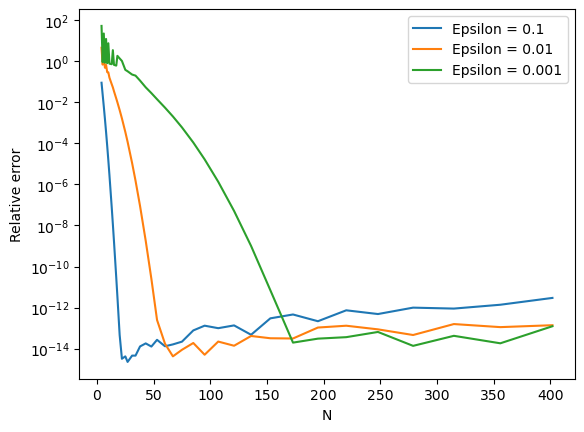

In [2]:
plot_approximations = False
epsilons = [0.1,0.01,0.001]
Ns = [10,20,50,100,200,500]
Ns = np.ceil(np.logspace(0,2.6,50))+3
rel_err = []
for eps in epsilons:
    for N in Ns:
        N = int(N)
        xGL = JacobiGL(0,0,N)
        ys = (xGL+1)/2
        dV = GradJacobiP(xGL,0,0,N,matrix=True)
        V = JacobiP(xGL,0,0,N,matrix=True).T
        Vi = np.linalg.inv(V)
        D = dV@Vi*2
        LN = -eps*D@D-D
        LN[0,:] = np.concatenate(([1],np.zeros(N)))
        LN[-1,:] = np.concatenate((np.zeros(N),[1]))
        f_tilde = np.concatenate(([0],np.ones(N-1),[0]))
        u_hat = np.linalg.solve(LN,f_tilde)
        rel_err.append(np.linalg.norm(u_hat-true_u(ys,eps))/(np.linalg.norm(true_u(ys,eps))))
        if N == 20 and plot_approximations:
            plt.figure()
            fine_grid = (JacobiGL(0,0,500)+1)/2
            plt.plot(fine_grid,true_u(fine_grid,eps), label="True solution")
            plt.plot(ys,u_hat,'o',label="Approximation")
            plt.xlabel("x")
            plt.title(f"Epsilon = {eps}")
            plt.legend()
plt.figure()
plt.semilogy(Ns,rel_err[0:len(Ns)],label=f"Epsilon = {epsilons[0]}")
plt.semilogy(Ns,rel_err[len(Ns):2*len(Ns)],label=f"Epsilon = {epsilons[1]}")
plt.semilogy(Ns,rel_err[2*len(Ns):(3*len(Ns))],label=f"Epsilon = {epsilons[2]}")
plt.legend()
plt.xlabel("N")
plt.ylabel("Relative error")

Legendre Tau Method

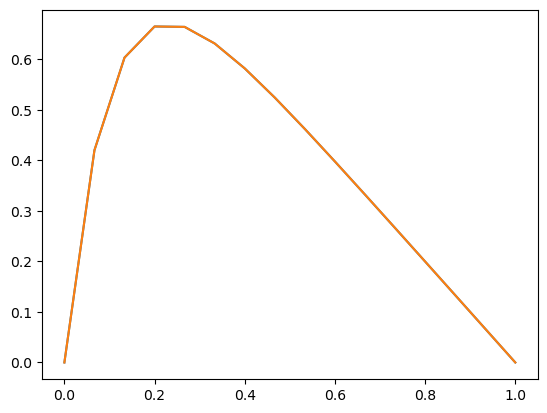

In [3]:
m = 16
#X = np.arange(m)/m*2 - 1
X = np.linspace(0,1,m)
eps = 0.1
testsol = LTM_2ord((X*2)-1, m, -eps*4, -2,None)

plt.figure
plt.plot(X,true_u(X,eps),label="True")
plt.plot(X,testsol,label="Approximation")
plt.show()

Part b)

In [16]:
def true_phi(r,theta):
    return (r+1/r)*np.cos(theta)
#true_phi = np.vectorize(true_phi)

N = 4
x_theta = np.linspace(0,2*np.pi,N)
x_r = JacobiGL(0,0,N-1)
X_r = (x_r+3)/2
D_theta = Dmatrix_Fourier(N,x_theta)
D_r = Dmatrix_Legendre(N-1,x_r,1,2)
temp_theta = np.kron(np.identity(N),D_theta/X_r)
LN = np.kron(D_r/X_r,np.identity(N))@np.kron(D_r*X_r,np.identity(N))+temp_theta@temp_theta
RHS = np.zeros(N**2)
# Boundary conditions
for i in range(N):
    index = N*i
    b1 = np.zeros(N**2)
    b1[index] = 1
    LN[index,:] = b1
    RHS[index] = 2*np.cos(x_theta[i])
    ##
    index = (N-1) + N*i
    b1 = np.zeros(N**2)
    b1[index] = 1
    LN[index,:] = b1
    RHS[index] = 2.5*np.cos(x_theta[i])
    ##
    index = i
    b1 = np.zeros(N**2)
    b1[index] = 1
    LN[index,:] = b1
    RHS[index] = X_r[i]+1/X_r[i]
    ##
    index = (N-1)*N + i
    b1 = np.zeros(N**2)
    b1[index] = 1
    LN[index,:] = b1
    RHS[index] = X_r[i]+1/X_r[i]

u_hat = np.linalg.solve(LN,RHS)
r,theta = np.meshgrid(X_r, x_theta)
true_sol = true_phi(r,theta)
print("rel error")
print(np.linalg.norm(true_sol - u_hat.reshape(N,N))/np.linalg.norm(true_sol))
print("True sol")
print(true_sol)
print("Uhat")
print(u_hat.reshape(N,N))

rel error
0.7582494120255371
True sol
[[ 2.          2.05985084  2.30378553  2.5       ]
 [-1.         -1.02992542 -1.15189276 -1.25      ]
 [-1.         -1.02992542 -1.15189276 -1.25      ]
 [ 2.          2.05985084  2.30378553  2.5       ]]
Uhat
[[ 2.          2.05985084  2.30378553  2.5       ]
 [-1.          0.98129894  1.09750776 -1.25      ]
 [-1.          1.90249224  2.12779197 -1.25      ]
 [ 2.          2.05985084  2.30378553  2.5       ]]
